##8\. Biblioteka Pandas

###Wstęp

Pandas to zewnętrzna biblioteka używana do analizy, przetwarzania i obrazowania dużych zbiorów danych np. zaimportowanych z zewnętrznych źródeł. 

Abo skorzystać z możliwości tej biblioteki należy ją zaimportować do swojego programu:

In [ ]:
import pandas

print(pandas.__version__)

1.3.5


Podczas improtowania bibliotek można skorzystać z tworzenia aliasów (innych nazw) - cel: wygoda, tylko i wyłącznie :)

In [ ]:
import pandas as pd
# od teraz można używać nazwy pd zamiast pandas...

print(pd.__version__)

1.3.5


###Serie
Serier są tablicami jednowymiarowymi (kolumna), które można utworzyć z innych typów uporządkowanych pythona (listy i krotki)

In [ ]:
import pandas as pd

lista = ["jeden",2,3.5,True,'2022-03-19']
krotka = (1,3,5,3,5)

seria = pd.Series(lista)
#seria = pd.Series(krotka)

print(seria)

0         jeden
1             2
2           3.5
3          True
4    2022-03-19
dtype: object


###Etykiety serii
Serie biblioteki pandas umożliwiają dodawanie etykiet, dzięki którym możliwe jest odowływanie się do elementów:


In [ ]:
import pandas as pd

dm = [31,28,31,30,31,30,31,31,30,31,30,31]
print("-------------- Lista ---------------\n")
print(dm)

data = pd.Series(dm) 
print("\n-------- Seria (pandas) ------------\n")
print(data)
print("\nElement o indeksie 0: ", data[0])

etykiety_pl = ["styczen","luty","marzec","kwiecien","maj","czerwiec",
          "lipiec","sierpien","wrzesien","pazdziernik","listopad","grudzien"]

dataWithLabel = pd.Series(dm,index = etykiety_pl)

print("\n------ Seria z etykietami ----------\n")
print(dataWithLabel)

print("\nElement o indeksie \"styczen\": ", dataWithLabel["styczen"])

-------------- Lista ---------------

[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

-------- Seria (pandas) ------------

0     31
1     28
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int64

Element o indeksie 0:  31

------ Seria z etykietami ----------

styczen        31
luty           28
marzec         31
kwiecien       30
maj            31
czerwiec       30
lipiec         31
sierpien       31
wrzesien       30
pazdziernik    31
listopad       30
grudzien       31
dtype: int64

Element o indeksie "styczen":  31


###Słownik jako seria.
Słownik jest typem nieuporządkownym, ale z uwagi na skojarzenie klucza z wartością możliwe jest przekonwertowanie go na serię biblioteki pandas. Możliwe jest również konwersja tylko wybranych elementów słownika na serię:

In [ ]:
import pandas as pd
slownik = {"Styczen": 31, "Luty": 28, "Marzec": 31}

dataWithLabel = pd.Series(slownik)

print("\n------ Seria ze słownika ----------\n")
print(dataWithLabel)

dataWithLabel = pd.Series(slownik, index = ["Styczen","Marzec"])
print("\n--- Seria ze słownika (wybrane) ---\n")
print(dataWithLabel)



------ Seria ze słownika ----------

Styczen    31
Luty       28
Marzec     31
dtype: int64

--- Seria ze słownika (wybrane) ---

Styczen    31
Marzec     31
dtype: int64


###DataFrame - tablice dwuwymiarowe

DataFrame to drugi obiekt typu tablicowego ale w przeciwieństwie do serii jest dwuwymiarowy (kolumny i wiersze).

###Konwersja danych na DataFrame
Poniższy przykład przedstawia konwersję złożonych danych na DataFrame:

In [ ]:
import pandas as pd

data = {
    "polish": ["styczen","luty","marzec","kwiecien","maj","czerwiec",
                "lipiec","sierpien","wrzesien","pazdziernik","listopad","grudzien"],
    "days" :  [31,28,31,30,31,30,31,31,30,31,30,31]   
}

dataFrame = pd.DataFrame(data)

print(dataFrame)

         polish  days
0       styczen    31
1          luty    28
2        marzec    31
3      kwiecien    30
4           maj    31
5      czerwiec    30
6        lipiec    31
7      sierpien    31
8      wrzesien    30
9   pazdziernik    31
10     listopad    30
11     grudzien    31


###Podzbiory danych
W celu wyświetlenia części danych można skorzystać z metod:
- `head(n)` - zwraca `n` pierwszysch wierszy DataFrame (domyślnie 5)
- `tail(n)` - zwraca `n` pierwszysch wierszy DataFrame
- `loc[]` - zwraca wybrane wiersze i kolumny według poniższego schematu:

  Składnia: `loc[start_row : stop_row , start_col : stop_col]`

In [ ]:
import pandas as pd

data = {
    "polish": ["styczen","luty","marzec","kwiecien","maj","czerwiec",
                "lipiec","sierpien","wrzesien","pazdziernik","listopad","grudzien"],
    "days" :  [31,28,31,30,31,30,31,31,30,31,30,31]   
}

dataFrame = pd.DataFrame(data)

print("Początkowe i końcowe elementy DataFrame:\n")
print(dataFrame.head())
print("------------------------------\n")
print(dataFrame.tail(4))
print("------------------------------\n")

print("Wiersz o indeksie 2:\n")
print(dataFrame.loc[2]) #To samo co loc[2,:]
print("------------------------------\n")
print("Wiersze o indeksie 2 i 4:\n")
print(dataFrame.loc[[2, 4]])
print("------------------------------\n")
print("Trzy pierwsze wiersze, kolumna 'polish' - bez nagłówka!\n")
print(dataFrame.loc[:3,'polish'])
print("------------------------------\n")
print("Trzy pierwsze wiersze, kolumna 'polish' - z nagłówkiem!\n")
print(dataFrame.loc[:3,['polish']])

Początkowe i końcowe elementy DataFrame:

     polish  days
0   styczen    31
1      luty    28
2    marzec    31
3  kwiecien    30
4       maj    31
------------------------------

         polish  days
8      wrzesien    30
9   pazdziernik    31
10     listopad    30
11     grudzien    31
------------------------------

Wiersz o indeksie 2:

polish    marzec
days          31
Name: 2, dtype: object
------------------------------

Wiersze o indeksie 2 i 4:

   polish  days
2  marzec    31
4     maj    31
------------------------------

Trzy pierwsze wiersze, kolumna 'polish' - bez nagłówka!

0     styczen
1        luty
2      marzec
3    kwiecien
Name: polish, dtype: object
------------------------------

Trzy pierwsze wiersze, kolumna 'polish' - z nagłówkiem!

     polish
0   styczen
1      luty
2    marzec
3  kwiecien


###Indeksy wierszy
Podobnie jak w seriach, w DataFrame możlwe jest dodanie własnych indeksów (nazw wierszy):

In [ ]:
import pandas as pd

data = {
    "polish": ["styczen","luty","marzec","kwiecien"],
    "days" :  [31,28,31,30]   
}

dataFrameWithIndex = pd.DataFrame(data, index = ["Jan","Feb","Mar","Apr"])

print(dataFrameWithIndex)

#Korzystanie z atrybutu loc:

print("------------------------------\n")
print(dataFrameWithIndex.loc["Apr"])

print("------------------------------\n")
print(dataFrameWithIndex.loc[["Apr","Jan"]])

print("------------------------------\n")
print(dataFrameWithIndex.loc[["Apr","Jan"],["polish"]])

       polish  days
Jan   styczen    31
Feb      luty    28
Mar    marzec    31
Apr  kwiecien    30
------------------------------

polish    kwiecien
days            30
Name: Apr, dtype: object
------------------------------

       polish  days
Apr  kwiecien    30
Jan   styczen    31
------------------------------

       polish
Apr  kwiecien
Jan   styczen


###Import danych z pliku

W przypadku dużej ilości danych wygodne jest importowanie ich z zewnętrznego źródł np. pliku csv, xlsx, json itp.

Podczas importowania należy zwrócić uwagę na sposób umieszczania danych (np. separator pliu CSV) oraz kodowanie pliku źródłowego (np. UTF-8)

***
Poniższe przykłady korzystają z importowanych danych z plików zewnętrznych.
Pliki te są dostępne pod następującymi adresami:

- CSV: https://drive.google.com/file/d/1V6m2aQpdGJYzz49D2Nl30xoiUTteU8GX/view?usp=sharing

- XLSX: https://docs.google.com/spreadsheets/d/19U75bUX_q7Nm-pd4t7cI3iHOUPzTTpIz/edit?usp=sharing&ouid=107656940894809904425&rtpof=true&sd=true

In [ ]:
import pandas as pd

dane = pd.read_csv("DanePogodowe2021.csv",sep=";",encoding="UTF-8",decimal=",")
#dane = pd.read_excel("DanePogodowe2021.xlsx")

print(dane)

###Funkcje (metody) DataFrame

Dokumentacja: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

- Sortowanie - porządkowanie danych po indeksach `sort_index(ascending=False|True)` lub wartościach `sort_values(by="Klucz",ascending=True)`. Sortowanie może być rosnące albo malejące.
- Suma - suma `sum()`wszystkich wartości dla danego klucza
- Min/Max - najmniejsza `min()` i największa `max()` wartość w zbiorze
- Średnia - średnia arytmetyczna `mean()`, pomija wartości puste `mean(skipna=True)`
- Odchylenie standardowe `std()` (pierwiastek kwadratowy z wariancji, wariancja to z kolei średnia kwadratów różnic wartości od średniej)
- Mediana `median()` - wartość środkowa uporządkowanego zbioru
- Dominata `mode()` - wartość przeważająca (najczęściej występująca)

In [ ]:
import pandas as pd

oceny = { 'Fizyka': [68.3, 84, 77, 78],
          'Matematyka': [34, 46, 93, 59],
          'Chemia': [34, 45, 45, 84]}

dane = pd.DataFrame(oceny)

print(dane)
print("\nSumy:")
print(dane.sum())

print("\nMax:")
print(dane.max())

print("\nMin:")
print(dane.min())

print(dane.agg([min,max,sum]))

print("\nŚrednie:")
print(dane.mean())

print("\nMediana:")
print(dane.median())

print("\nDominata:")
print(dane.mode())

print("\nOdchylenie standardowe:")
print(dane.std())

print("\nPosortowane po fizyce:")
print(dane.sort_values(by="Fizyka", ascending=False))

print("\nPosortowane po indeksach:")
print(dane.sort_index(ascending=False))

print("\nInfo o danych:")
print(dane.info())

print("\nOpis danych:")
print(dane.describe())

   Fizyka  Matematyka  Chemia
0    68.3          34      34
1    84.0          46      45
2    77.0          93      45
3    78.0          59      84

Sumy:
Fizyka        307.3
Matematyka    232.0
Chemia        208.0
dtype: float64

Max:
Fizyka        84.0
Matematyka    93.0
Chemia        84.0
dtype: float64

Min:
Fizyka        68.3
Matematyka    34.0
Chemia        34.0
dtype: float64
     Fizyka  Matematyka  Chemia
min    68.3          34      34
max    84.0          93      84
sum   307.3         232     208

Średnie:
Fizyka        76.825
Matematyka    58.000
Chemia        52.000
dtype: float64

Mediana:
Fizyka        77.5
Matematyka    52.5
Chemia        45.0
dtype: float64

Dominata:
   Fizyka  Matematyka  Chemia
0    68.3          34    45.0
1    77.0          46     NaN
2    78.0          59     NaN
3    84.0          93     NaN

Odchylenie standardowe:
Fizyka         6.469608
Matematyka    25.468935
Chemia        21.954498
dtype: float64

Posortowane po fizyce:
   Fizyka  Matema

###Eksport danych DataFrame

Biblioteka pandas umożliwia eksport danych z DataFrame np. do pliku HTML lub Excel.

In [ ]:
html = dane.to_html()
#print(html)
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()

excel = pd.ExcelWriter('wynik.xlsx')
dane.to_excel(excel)
excel.save()

##9. Wykresy danych.
###Tworzenie wykresu za pomocą matplotlib

Do rysowania różnego rodzaju wykresów przydatne będą możliwości biblioteki matplotlib.

Poniższy przykład przedstawia import wymaganych bibliotek oraz danych zewnętrznych.

In [ ]:
#import bibliotek i danych
import pandas as pd
import matplotlib.pyplot as pl

In [ ]:
dane = pd.read_csv("DanePogodowe2021.csv", sep=";", decimal=",")

     Temperatura  Wiatr
0           -2.8    5.7
1           -1.9    8.0
2           -0.5    8.0
3            0.3    8.0
4           -0.2    8.0
..           ...    ...
360         -9.6    1.7
361         -2.7    6.0
362          2.9    8.0
363          6.3    7.7
364         10.5    7.0

[365 rows x 2 columns]


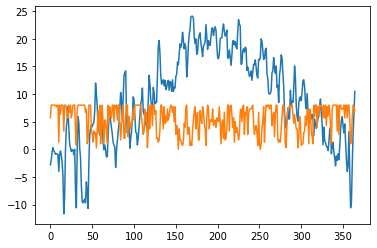

In [ ]:
tmp_wind = dane.loc[:,['Temperatura','Wiatr']]
print(tmp_wind)

pl.plot(tmp_wind)
pl.show()

###Formatowanie obszaru wykresu

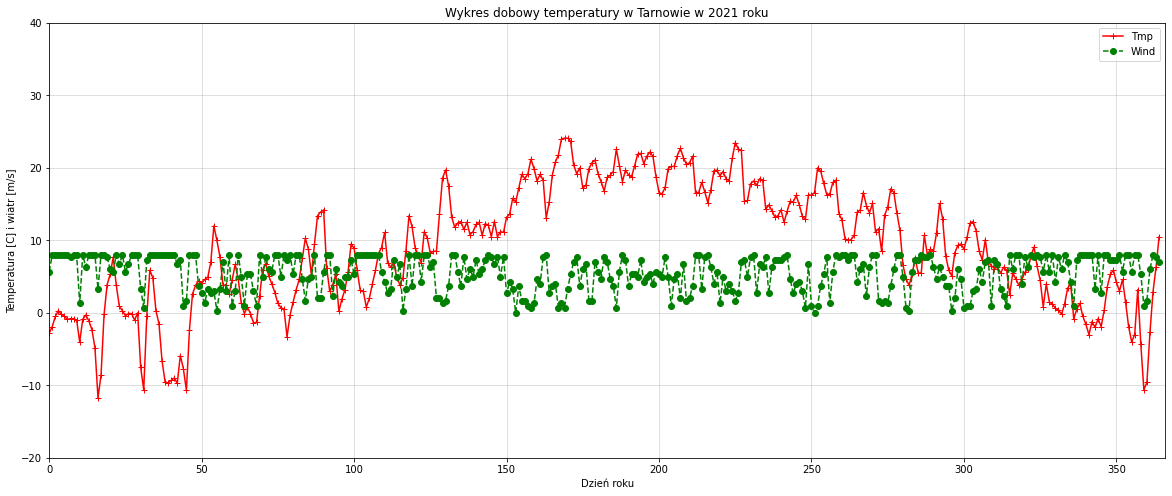

In [ ]:
Tmp = dane.loc[:,['Temperatura']]
Wnd = dane.loc[:,['Wiatr']]

pl.figure(figsize=[20,8])
pl.title("Wykres dobowy temperatury w Tarnowie w 2021 roku")
pl.xlabel('Dzień roku')
pl.ylabel("Temperatura [C] i wiatr [m/s]")
pl.axis([0,366,-20,40])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(Tmp,'-r+')
pl.plot(Wnd,'--go')
pl.legend(["Tmp","Wind"])

pl.show()

### Dwa wykresy na osobnych osiach Y



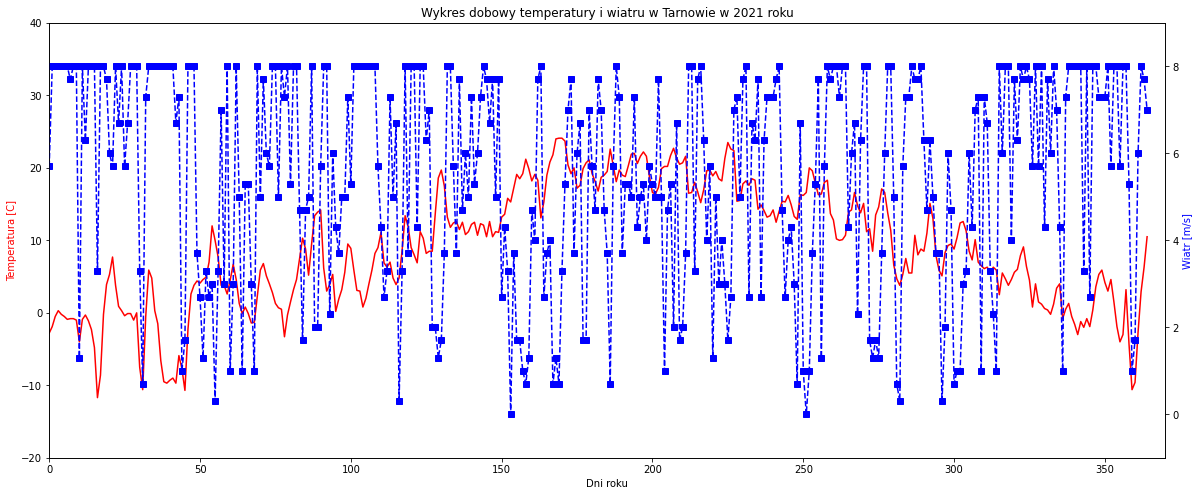

In [ ]:
Tmp = dane.loc[:,'Temperatura']
Wnd = dane.loc[:,'Wiatr']

fig, axis1 = pl.subplots(figsize=(20,8)) 

axis1.set_title("Wykres dobowy temperatury i wiatru w Tarnowie w 2021 roku")
axis1.set_xlabel('Dni roku') 
axis1.set_ylabel('Temperatura [C]', color = 'red') 
axis1.plot(Tmp, 'r') 
axis1.axis([0,370,-20,40])

axis2 = axis1.twinx() 
axis2.axis([0,370,-1,9]) 
axis2.set_ylabel('Wiatr [m/s]', color = 'blue') 
axis2.plot(Wnd, '--bs') 

pl.show()


###Przykład (funkcja liniowa i kwadratowa)

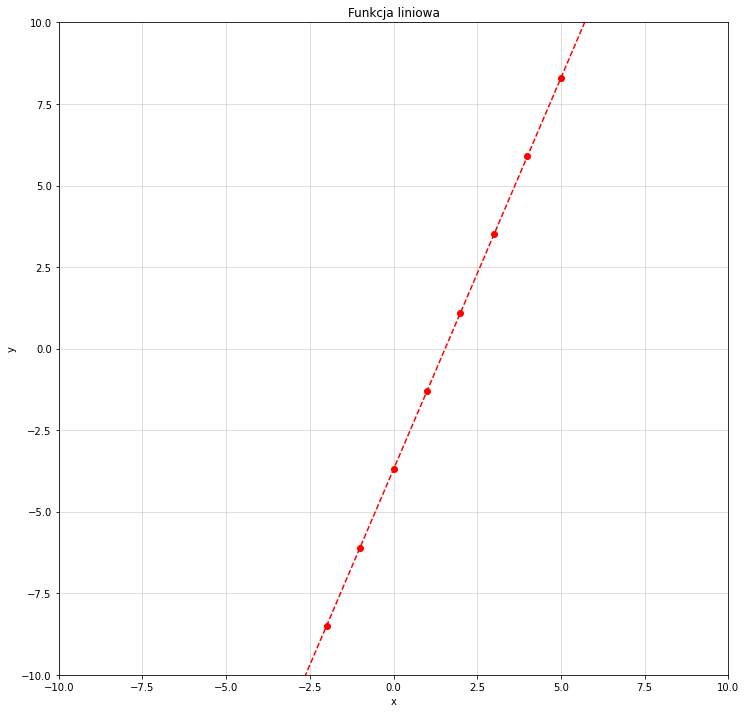

In [ ]:
x = range(-10,10)
a = 2.4
b = -3.7
#a = float(input('Podaj a '))
#b = float(input('Podaj b '))
y = []
for xi in x:
  y.append(a*xi+b)


pl.figure(figsize=[12,12])
pl.title("Funkcja liniowa")
pl.xlabel('x')
pl.ylabel("y")
pl.axis([-10,10,-10,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'--ro')
pl.show()

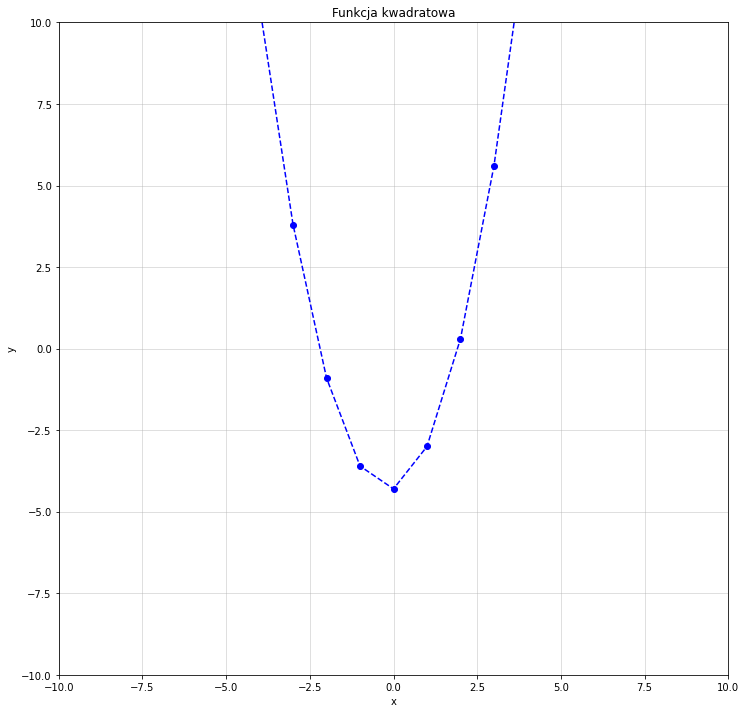

In [ ]:
x = range(-10,10)
a = 1.0
b = .3
c = -4.3
#a = float(input('Podaj a '))
#b = float(input('Podaj b '))
#c = float(input('Podaj c '))
y = []
for xi in x:
  y.append(a*xi*xi+b*xi+c)


pl.figure(figsize=[12,12])
pl.title("Funkcja kwadratowa")
pl.xlabel('x')
pl.ylabel("y")
pl.axis([-10,10,-10,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'--bo')
pl.show()

###Rysowanie wykresów - pandas i matplotlib:
- wykres pudełkowy
- wykres punktowy
- wykres bąbelkowy
- histogram
- kołowy

Wykresy można rysować przy użyciu biblioteki matplotlib (tak jak w powyższych przykładach) albo korzystać z dedykowanej metody plot biblioteki pandas. 

###Wykres pudełkowy:
Wykres przedstawia rozkład jakiejść cechy statystycznej. 

Budowa: 
- dolna krawędź odcinka (najczęściej najmniejsza wartość), 
- górna krawędź odcinka (najczęściej najwyższa wartość), 
- dolna krawędź pudełka (pierwszy kwartyl - 25% danych położona jest poniżej)
- górna krawędź pudełka (trzeci kwartyl - 25% danych położona jest powyżej)
- wysokość pudełka (rozstęp ćwiartkowy, drugi kwartyl - 50% danych)
- zielona linia - mediana


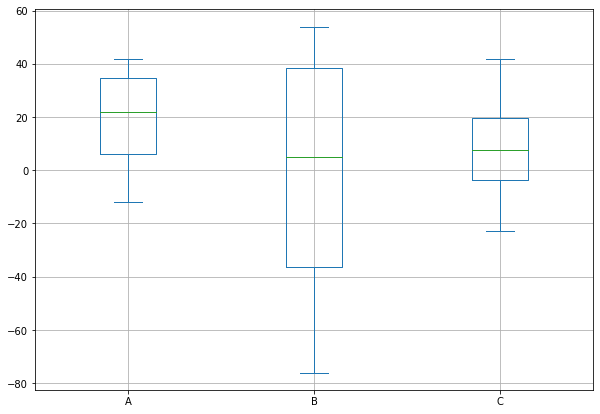

In [ ]:
dataFrame = pd.DataFrame({"A": [-12,32,12,42], "B": [33,-23,54,-76], "C": [12,3,42,-23]})

dataFrame.plot.box(grid='True',figsize=(10,7))

###Wykres punktowy

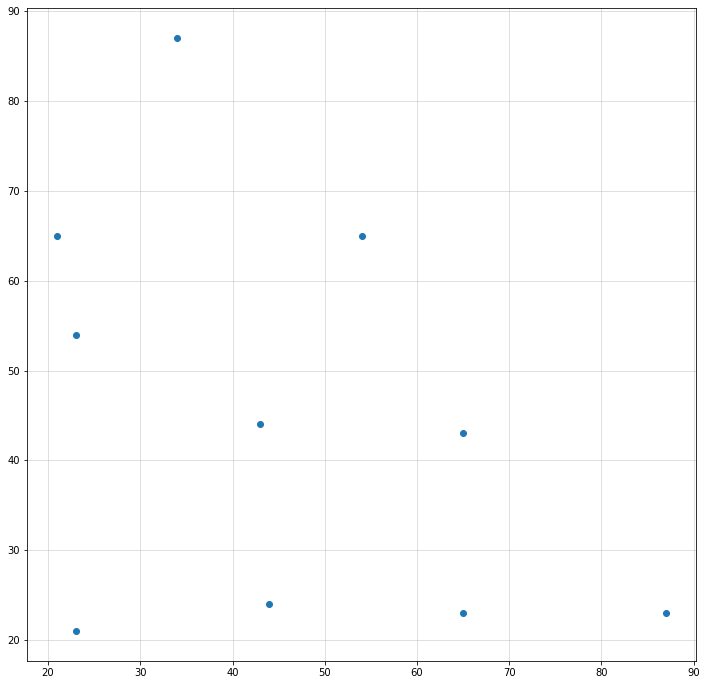

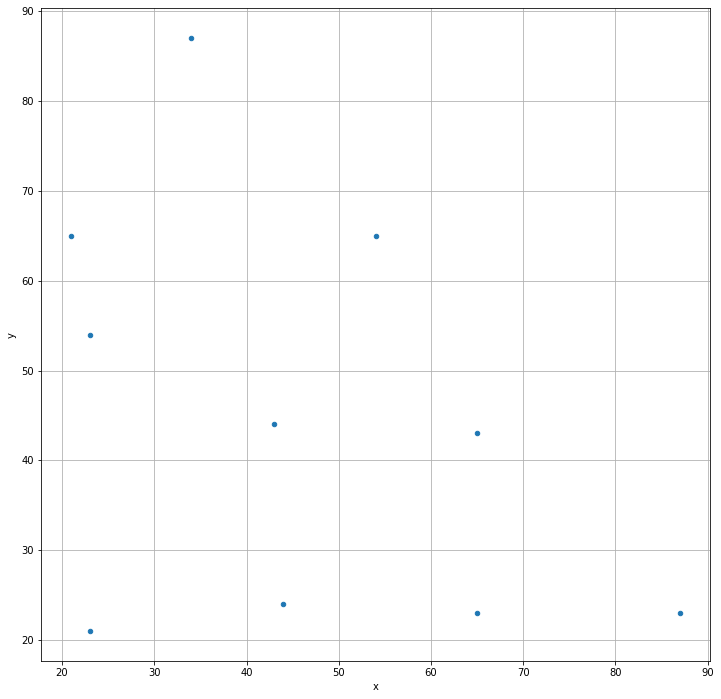

In [ ]:
data = {
    "y": [23,44,21,54,24,65,65,87,43,23],
    "x": [87,43,23,23,44,21,54,34,65,65]   
}

pl.figure(figsize=[12,12])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.scatter(data["x"],data["y"])
pl.show()

dataFrame = pd.DataFrame(data)
dataFrame.plot.scatter(x='x', y='y',grid = True,figsize = (12,12))

###Wykres bąbelkowy (punktowy)


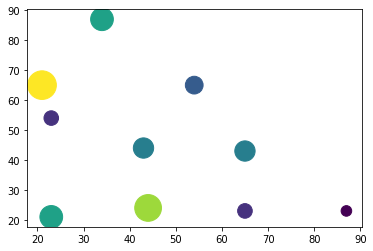

In [ ]:

data = {
    "y": [23,44,21,54,24,65,65,87,43,23],
    "x": [87,43,23,23,44,21,54,34,65,65],
    "v": [112,412,516,212,715,819,315,516,412,214]   
}

pl.scatter(data["x"],data["y"],data["v"],c=data["v"])
pl.show()

###Histogram



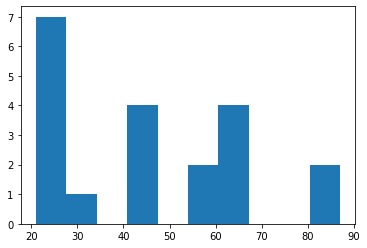

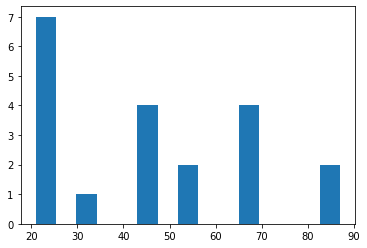

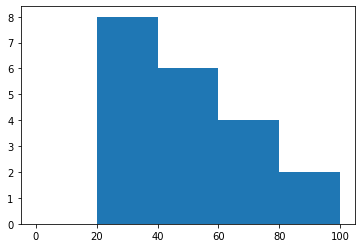

In [ ]:
dane = [23,44,21,54,24,65,65,87,43,23,87,43,23,23,44,21,54,34,65,65]   

pl.hist(dane)
pl.show()
print()
pl.hist(dane, bins = 15)
pl.show()
print()
pl.hist(dane, bins=[0,20,40,60,80,100])
pl.show()

###Wykres kołowy

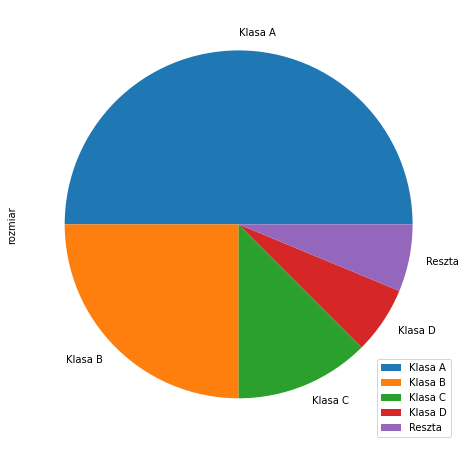

In [ ]:
dataFrame = pd.DataFrame({"rozmiar": [2**31,2**30,2**29,2**28,2**28]}, index = ["Klasa A","Klasa B","Klasa C","Klasa D","Reszta"])
dataFrame.plot.pie(y='rozmiar', figsize=(8, 8))

#10\. Filtrowanie danych



In [ ]:
#import bibliotek i danych
import pandas as pd
import matplotlib.pyplot as pl

In [ ]:
dane = pd.read_csv("DanePogodowe2021null.csv",sep=";",decimal=",")
df = pd.DataFrame(dane)

##Usuwanie lub uzupełnianie pustych rekordów

In [ ]:
df2 = df.dropna()

print(df)
print(df2)

#df.dropna(inplace=True)
#print(df)

df3=df.fillna(123)
print(df3)

      Rok  Miesiąc  Dzień  Temperatura  Wiatr
0    2021        1      1         -2.8    5.7
1    2021        1      2         -1.9    NaN
2    2021        1      3         -0.5    NaN
3    2021        1      4          0.3    NaN
4    2021        1      5         -0.2    NaN
..    ...      ...    ...          ...    ...
360  2021       12     27         -9.6    1.7
361  2021       12     28         -2.7    6.0
362  2021       12     29          2.9    NaN
363  2021       12     30          6.3    7.7
364  2021       12     31         10.5    7.0

[365 rows x 5 columns]
      Rok  Miesiąc  Dzień  Temperatura  Wiatr
0    2021        1      1         -2.8    5.7
7    2021        1      8         -0.8    7.7
10   2021        1     11         -4.0    1.3
12   2021        1     13         -0.3    6.3
16   2021        1     17        -11.7    3.3
..    ...      ...    ...          ...    ...
359  2021       12     26        -10.6    1.0
360  2021       12     27         -9.6    1.7
361  2021 

##Wykrywanie i usuwanie duplikatów


In [ ]:
lista = [1,2,3,4,5,6,7,5,4,5,6,7,5,43,4,5]
df = pd.DataFrame(lista)

print(df.duplicated())
print(df.drop_duplicates())

##Korelacja pomiędzy danymi

In [ ]:
dane = {'Temp1':[1,2,3,4,3,2,1,2,3],
        'Temp2':[3,4,5,5,4,3,2,2,1],
        'Temp3':[2,4,6,9,5,4,2,4,7],}
        
df = pd.DataFrame(dane)

print(df)

df.corr()

   Temp1  Temp2  Temp3
0      1      3      2
1      2      4      4
2      3      5      6
3      4      5      9
4      3      4      5
5      2      3      4
6      1      2      2
7      2      2      4
8      3      1      7


,Temp1,Temp2,Temp3
Temp1,1.000000,0.478091,0.968936
Temp2,0.478091,1.000000,0.371466
Temp3,0.968936,0.371466,1.000000
